In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [192]:
for_pred = pd.read_csv("Data/features_30_sec.csv")
music_data = pd.read_csv("Data/features_3_sec.csv")

display(music_data.columns)
music_data.info()
#music_data['label'].value_counts()

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [193]:
# path = "Data/genres_original/blues/blues.00000.wav"
# plt.figure(figsize=(14,5))
# data, sampling_rate = librosa.load(path)
# librosa.display.waveshow(data, sr=sampling_rate, color='blue')
# print("Blue")

In [194]:
# path = "Data/genres_original/metal/metal.00000.wav"
# plt.figure(figsize=(14, 5))
# data, sampling_rate = librosa.load(path)
# librosa.display.waveshow(data, sr=sampling_rate, color='orange')
# print('Metal')

In [195]:
# path = "Data/genres_original/pop/pop.00000.wav"
# plt.figure(figsize=(14, 5))
# data, sampling_rate = librosa.load(path)
# librosa.display.waveshow(data, sr=sampling_rate, color='purple')
# print('Pop')

In [196]:
# path = "Data/genres_original/hiphop/hiphop.00000.wav"
# plt.figure(figsize=(14, 5))
# data, samplin_rate = librosa.load(path)
# librosa.display.waveshow(data, sr=sampling_rate, color='grey')
# print("Hip-Hop")

In [197]:
# path = "Data/genres_original/country/country.00000.wav"
# plt.figure(figsize=(14, 5))
# data, sampling_rate = librosa.load(path)
# librosa.display.waveshow(data, sr=sampling_rate, color='brown')
# print("Country")

In [198]:
#Computing the correlation matrix
# spike_col = [col for col in music_data.columns if 'mean' in col]
# print(spike_col)

# #Matplotlib Figure
# f, ax = plt.subplots(figsize= (16, 11))

# #Draw the heatmap 
# sns.heatmap(music_data[spike_col].corr(), cmap="YlGn")
# plt.title('Heatmap for MEAN variables', fontsize=20)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)

In [199]:

#Data Preprocessing
label_encode = preprocessing.LabelEncoder()
class_list = music_data.iloc[:, -1]
#music_data['label'] = label_encode.fit_transform(music_data['label'])

#filename column is not relevant, so dropping filename column
y = label_encode.fit_transform(class_list)
X = music_data.drop(['label', 'filename', 'length'], axis=1)

#Scaling data to make model more stable and train fast
cols = X.columns
minmax = preprocessing.StandardScaler()
np_scaled = minmax.fit_transform(X)

#New DataFrame with new Scaled Data
X = pd.DataFrame(np_scaled, columns = cols)

X.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,-0.487808,0.640520,-0.006624,0.235568,-0.566828,-0.572791,-0.493983,-0.009229,-0.518590,-0.367952,-0.454064,-0.570777,0.168385,-0.335954,0.295495,-0.009975,0.131009,0.251728,-0.141988,0.694964,-0.713185,-0.561033,-0.034151,0.229042,-0.016645,-0.292379,0.083698,0.373044,-0.423366,-0.921920,-0.889288,0.637318,0.207617,-0.754018,0.204064,0.224729,0.673577,-0.409692,0.071046,0.693864,-0.338503,0.070763,-0.642357,1.027750,-0.153788,-0.515791,-0.265968,-0.750122,-0.299108,0.168647,-0.425137,-0.003423,-0.376938,-0.499464,-0.513562,0.128414,-0.291781
1,-0.403142,0.131835,-0.264944,-0.342134,-0.508798,-0.749862,-0.425382,-0.519010,-0.424118,-0.642268,-0.337473,-0.440170,0.156342,-0.605355,0.263734,-0.112440,-0.055935,0.186320,-0.296811,0.618174,-0.809301,-0.447326,-0.482782,0.723712,-0.309489,-0.687218,-0.041866,0.473445,-0.394832,-0.914289,-0.017413,0.781073,-0.367204,-0.522643,-0.134981,1.087476,-0.300554,-0.668525,-0.234700,0.424272,-0.456989,-0.354962,-0.736384,1.024415,-0.140138,-0.695751,0.427020,0.457983,0.428544,-0.327031,-0.310040,-0.112125,-0.032083,-0.066593,1.011384,1.275780,0.056425
2,-0.361694,0.764491,0.016695,0.542195,-0.546245,-0.701852,-0.288365,-0.425734,-0.346190,-0.562723,-0.683379,-0.607419,0.175942,-0.009629,0.415753,-0.187073,-0.055935,0.121959,0.381194,0.406587,-0.721094,-0.200934,-0.617035,0.727133,-0.298483,0.097898,-0.141313,0.731507,-0.545653,-0.692909,-0.140170,0.438458,-0.425926,-0.602780,1.028363,0.240055,-0.789404,-0.190173,-0.395388,0.914693,-0.566195,0.071315,-0.458957,0.724276,-0.620000,0.295239,-0.063484,0.585548,0.503695,0.428053,-0.648762,0.316311,-0.177372,0.109337,-0.046244,0.653907,-0.521458
3,-0.175714,0.205477,0.024885,-0.063820,-0.723482,-0.700599,-0.517344,-0.348881,-0.607665,-0.474804,-0.726248,-0.640986,0.206475,-0.338752,0.373503,0.048886,-0.055935,0.255456,-0.115604,0.897807,-0.557221,-0.365575,-0.899218,0.141858,0.005873,-0.829252,0.005313,0.400944,0.194107,-0.788267,-0.451187,0.717328,-0.001006,-0.660298,-0.009853,0.532748,-0.651053,-0.785692,-0.131096,0.721028,-0.498634,0.115475,0.100277,1.149176,-0.362144,-0.963740,-0.215086,-0.489524,-0.065309,0.062981,-0.649076,0.092384,-0.464121,-0.211882,-0.099501,0.865880,-0.544744
4,-0.485895,0.337521,0.181345,-0.272072,-0.756246,-0.774827,-0.538557,-0.572962,-0.667537,-0.683920,-0.711602,-0.645175,0.238425,-0.234588,0.261354,0.034742,-0.055935,0.370652,-0.265774,0.970695,-0.803235,-0.415777,-0.686890,0.164463,-0.606729,-0.903804,-0.376751,0.263928,-0.378335,-0.883498,-0.762892,0.758943,-0.461040,-1.142710,0.469290,0.682383,-0.238469,0.091036,-0.218380,1.601141,-0.388495,-0.069426,-0.296970,0.582003,-0.771951,-0.642723,-0.345270,0.112417,-0.570609,0.856651,-0.167089,0.183265,-0.029476,-0.175130,-0.678995,0.276899,-0.606692


In [200]:
#Splitting Data into Testing Data & Training Data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                   metrics=['accuracy']
    )
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, 
                     batch_size=batch_size)

def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()



model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10, activation="softmax"),
    
])




c:\Users\Jadge\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [201]:
display(X_train.columns)

Index(['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var'],
      dtype='object')

In [202]:
#Compiling & Fitting the Model
# adam = keras.optimizers.Adam(learning_rate=1e-4)
# model.compile(optimizer=adam, 
#               loss='sparse_categorical_crossentropy', 
#               metrics=['accuracy'])
# hist = model.fit(X_train, y_train, validation_data= (X_test, y_test),
#                 epochs=100,
#                 batch_size=32)

model_history = trainModel(model=model, epochs=70, optimizer='adam')

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is :",test_loss)
print("\nThe test Accuracy is :",test_accuracy*100)

Epoch 1/70
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3052 - loss: 1.9086 - val_accuracy: 0.5999 - val_loss: 1.1704
Epoch 2/70
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5634 - loss: 1.2124 - val_accuracy: 0.6918 - val_loss: 0.9118
Epoch 3/70
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6656 - loss: 0.9778 - val_accuracy: 0.7304 - val_loss: 0.7868
Epoch 4/70
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7306 - loss: 0.8041 - val_accuracy: 0.7674 - val_loss: 0.6980
Epoch 5/70
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7587 - loss: 0.7060 - val_accuracy: 0.7847 - val_loss: 0.6272
Epoch 6/70
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7923 - loss: 0.6295 - val_accuracy: 0.7868 - val_loss: 0.6188
Epoch 7/70
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7979 - loss: 0.5956 - val_accuracy: 0.8089 - val_loss: 0.5553
Epoch 8/70
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8133 - loss: 0.5497 - val_accuracy: 0.8305 - val_loss:

In [203]:
#Test Accuracy
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.9073 - loss: 0.4449
Test Accuracy: 0.9090082049369812


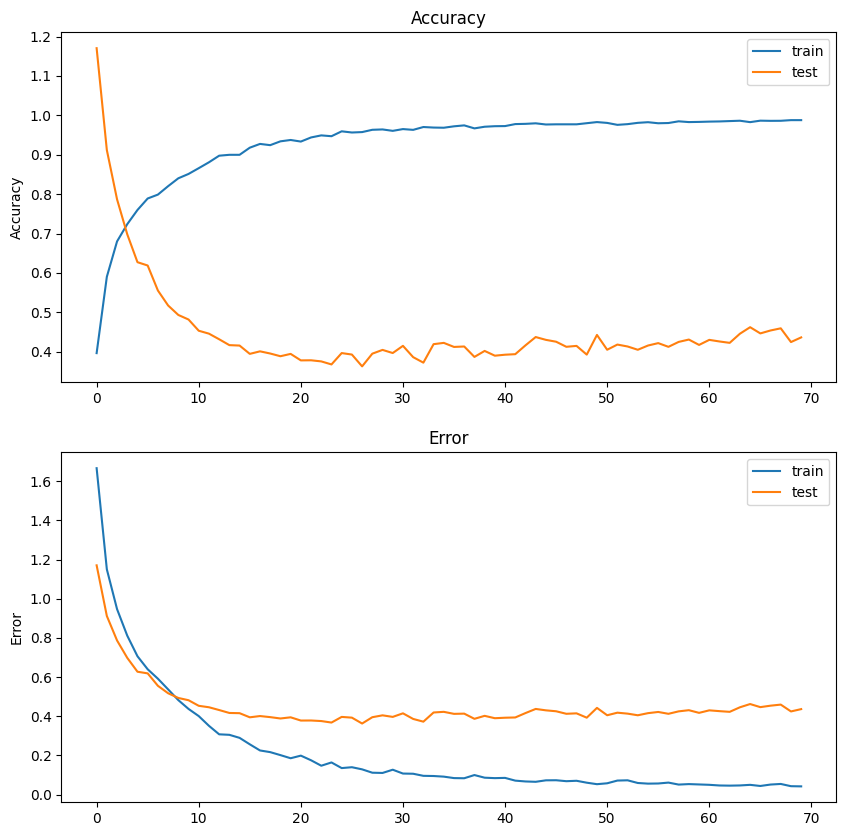

In [204]:
fig, axs = plt.subplots(2, figsize=(10, 10))

#Accuracy
axs[0].plot(model_history.history['accuracy'], label="train")
axs[0].plot(model_history.history['val_loss'], label="test")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")

#Error
axs[1].plot(model_history.history["loss"], label="train") 
axs[1].plot(model_history.history["val_loss"], label="test")     
axs[1].set_ylabel("Error") 
axs[1].legend() 
axs[1].set_title("Error") 
      
plt.show()

In [205]:
# pr = np.array([0.35008812, 0.088756569, 0.130227923, 0.002826696, 1784.16585, 129774.0645, 2002.44906, 85882.76132, 3805.839606, 
#                901505.4255, 0.083044821, 0.000766946, -4.53E-05, 0.008172282, 7.78E-06, 0.005698182, 123.046875, -113.5706482, 
#                2564.20752, 121.5717926, 295.9138184, -19.16814232, 235.5744324, 42.36642075, 151.1068726, -6.364664078, 167.9347992, 
#                18.62349892, 89.18083954, -13.7048912, 67.66049194, 15.34315014, 68.93257904, -12.27410984, 82.20420074, 10.97657204, 
#                63.38631058, -8.326573372, 61.77309418, 8.803792, 51.24412537, -3.6723001, 41.21741486, 5.7479949, 40.55447769, 
#                -5.162881851, 49.77542114, 0.752740204, 52.42090988, -1.690214634, 36.52407074, -0.408979177, 41.59710312, 
#                -2.303522587, 55.06292343, 1.221290708, 46.93603516]).reshape(1, -1) 
predictions = model.predict(X_test)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [206]:
display(predictions)

array([[2.23178572e-13, 2.12464811e-12, 4.06729941e-14, ...,
        6.76461664e-10, 2.14452484e-06, 2.39752337e-13],
       [1.09107793e-06, 2.48579141e-07, 1.09967365e-11, ...,
        5.38316232e-11, 1.07186302e-10, 6.58795327e-12],
       [8.89864964e-07, 1.43995521e-06, 9.99942303e-01, ...,
        5.94782477e-07, 1.88875774e-07, 4.47989123e-06],
       ...,
       [2.94792607e-10, 9.99989271e-01, 2.46805199e-09, ...,
        6.69581014e-12, 2.69312576e-11, 3.43583029e-09],
       [2.13898921e-09, 4.68547512e-09, 1.77649788e-08, ...,
        9.99992490e-01, 5.42512453e-06, 1.27540568e-06],
       [4.12829628e-04, 2.95295991e-04, 1.83305201e-06, ...,
        5.95089489e-07, 2.41860903e-06, 1.29037392e-06]], dtype=float32)

In [207]:
predicts = pd.DataFrame(predictions)
predicts.columns = list(set(y_test))
predict = []
for pred in predictions:
    predict.append(np.argmax(pred))

predicts['Label'] = predict

In [208]:
predicts['Real'] = list(y_test.copy())
pd.set_option('display.max_columns', None)
print(predicts)

                 0             1             2             3             4  \
0     2.231786e-13  2.124648e-12  4.067299e-14  2.683431e-08  9.999979e-01   
1     1.091078e-06  2.485791e-07  1.099674e-11  1.104176e-11  3.903078e-15   
2     8.898650e-07  1.439955e-06  9.999423e-01  3.418871e-08  4.346824e-08   
3     2.184263e-06  1.923830e-06  1.059532e-05  6.162626e-05  1.077523e-06   
4     1.208265e-03  4.591150e-05  9.966689e-01  5.000632e-05  7.991827e-05   
...            ...           ...           ...           ...           ...   
3292  9.999999e-01  2.148694e-11  1.133795e-07  2.402332e-11  2.675176e-10   
3293  1.614371e-05  5.407262e-05  9.373541e-01  5.376866e-07  5.475812e-06   
3294  2.947926e-10  9.999893e-01  2.468052e-09  2.863906e-10  9.365737e-10   
3295  2.138989e-09  4.685475e-09  1.776498e-08  2.141705e-08  7.179790e-07   
3296  4.128296e-04  2.952960e-04  1.833052e-06  7.850895e-08  4.424282e-09   

                 5             6             7             8   

In [209]:
display(predicts['Label'], predicts['Real'])

0       4
1       5
2       2
3       9
4       2
       ..
3292    0
3293    2
3294    1
3295    7
3296    5
Name: Label, Length: 3297, dtype: int64

0       4
1       0
2       2
3       9
4       2
       ..
3292    0
3293    2
3294    1
3295    7
3296    5
Name: Real, Length: 3297, dtype: int32

In [210]:
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(list(y_test.copy()),predict)

In [211]:
display(list(set(y_test)))





[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

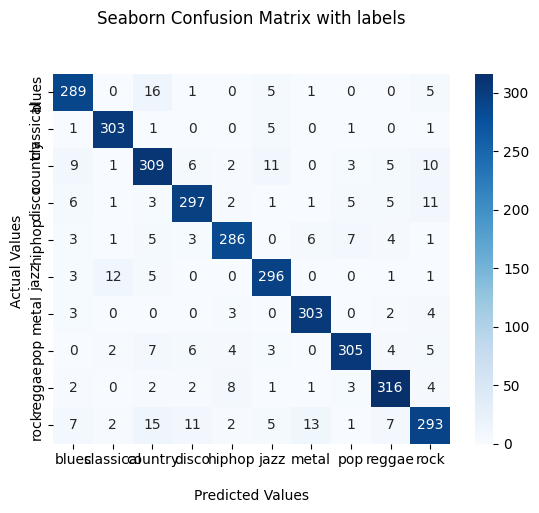

In [212]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([
 'blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock'
 ])
ax.yaxis.set_ticklabels([
 'blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock'
 ])

## Display the visualization of the Confusion Matrix.
plt.show()

In [213]:
model.save('genre_model.h5')

In [214]:
import pickle
with open('music_genre_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)